In [2]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import os
from tqdm import tqdm
import enzope
from enzope.graphs.graph_class import GTG

In [3]:
datapath = os.path.join(os.getcwd(), 'data')
figpath = os.path.join(os.getcwd(), 'figs')

def r1(x):
    return x**(-1)

# f(w) = (a/m) * (w/m)^-(a+1)
a, m = 1.5, 1  # shape and mode

In [4]:
def print_info(gtgs):
    print(f"Mean k: {np.mean([gtgs[i].get_mean_connectivity() for i in range(len(gtgs))])}")
    print(f"Mean clustering: {np.mean([nx.average_clustering(gtgs[i].G) for i in range(len(gtgs))])}")
    print(f"Mean assortativity: {np.mean([nx.degree_assortativity_coefficient(gtgs[i].G) for i in range(len(gtgs))])}")

In [13]:
def simulate(
    n_nodes=1000,
    runs=10,
    mcs=20000,
    f = 0,
    gtgs=None,
    filename="testing",
):
    # Funcion para simular un yard-sale en redes gtg
    models = [
        enzope.models.model.CPUModel(
            n_agents=n_nodes,
            f = f,
            G=gtgs[i] if gtgs is not None else None,
            measure_every=1,
        )
        for i in range(runs)
    ]
    ginis = np.zeros((runs, mcs))
    n_actives = np.zeros((runs, mcs))
    liquiditys = np.zeros((runs, mcs - 1))
    for i in tqdm(range(runs)):
        models[i].MCS(mcs)
        ginis[i] = models[i].gini
        n_actives[i] = models[i].n_active
        liquiditys[i] = models[i].liquidity
    np.save(os.path.join(datapath, filename, f"gini_f={f}.npy"), ginis)
    np.save(os.path.join(datapath, filename, f"n_actives_f={f}.npy"), n_actives)
    np.save(os.path.join(datapath, filename, f"liquidity_f={f}.npy"), liquiditys)

### Simulacion de todas las redes

### Simulacion para $f=\{0, .15\}$

In [21]:
# Valores de theta para tener aprox 6 +- 1 neighs (con 1000 nodos)
# AddExpR2 = 900, MulExpR2 = 450, AddParR2 = 2800, MulParR2 = 3800,
# AddExpR1 = 55, MulExpR1 = 40, AddParrR1 = 200, MulParR1 = 380,
n_nodes = 1000
mcs_set = [30000, 50000]
reps = 5
f_set = [0, .15]

for f, mcs in zip(f_set, mcs_set):
    print("-----------------------")
    print(f"0: Mean Field, f={f}")
    print("-----------------------")
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, filename="mean_field")

    print("-----------------------")
    print("1: AddExpR2")
    print("-----------------------")
    theta = 900
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, join='add') for i in range(reps)]
    print_info(gtgs)
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, gtgs=gtgs, filename="add_exp_r2")

    print("-----------------------")
    print("2: MulExpR2")
    print("-----------------------")
    theta = 450
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, join='mul') for i in range(reps)]
    print_info(gtgs)
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, gtgs=gtgs, filename="mul_exp_r2")

    print("-----------------------")
    print("3: AddParR2")
    print("-----------------------")
    theta = 2800
    weights = [dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m)) for _ in range(reps)]
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, w0=weights[i], join='add') for i in range(reps)]
    print_info(gtgs)
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, gtgs=gtgs, filename="add_par_r2")

    print("-----------------------")
    print("4: MulParR2")
    print("-----------------------")
    theta = 3800
    weights = [dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m)) for _ in range(reps)]
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, w0=weights[i], join='mul') for i in range(reps)]
    print_info(gtgs)
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, gtgs=gtgs, filename="mul_par_r2")

    print("-----------------------")
    print("5: AddExpR1")
    print("-----------------------")
    theta = 55
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, join='add', p_dist=r1) for i in range(reps)]
    print_info(gtgs)
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, gtgs=gtgs, filename="add_exp_r1")

    print("-----------------------")
    print("6: MulExpR1")
    print("-----------------------")
    theta = 40
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, join='mul', p_dist=r1) for i in range(reps)]
    print_info(gtgs)
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, gtgs=gtgs, filename="mul_exp_r1")

    print("-----------------------")
    print("7: AddParR1")
    print("-----------------------")
    theta = 200
    weights = [dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m)) for _ in range(reps)]
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, w0=weights[i], join='add', p_dist=r1) for i in range(reps)]
    print_info(gtgs)
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, gtgs=gtgs, filename="add_par_r1")

    print("-----------------------")
    print("8: MulParR1")
    theta = 380
    weights = [dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m)) for _ in range(reps)]
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, w0=weights[i], join='mul', p_dist=r1) for i in range(reps)]
    print_info(gtgs)
    simulate(n_nodes=n_nodes, f=f, runs=reps, mcs=mcs, gtgs=gtgs, filename="mul_par_r1")

-----------------------
0: Mean Field, f=0
-----------------------


100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


-----------------------
1: AddExpR2
-----------------------
Mean k: 6.7032
Mean clustering: 0.6288262737123406
Mean assortativity: 0.08295024488752617


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


-----------------------
2: MulExpR2
-----------------------
Mean k: 6.587999999999999
Mean clustering: 0.5300701728709238
Mean assortativity: 0.030971744300829142


 20%|██        | 1/5 [00:02<00:08,  2.05s/it]


KeyboardInterrupt: 

### Idea para plotear

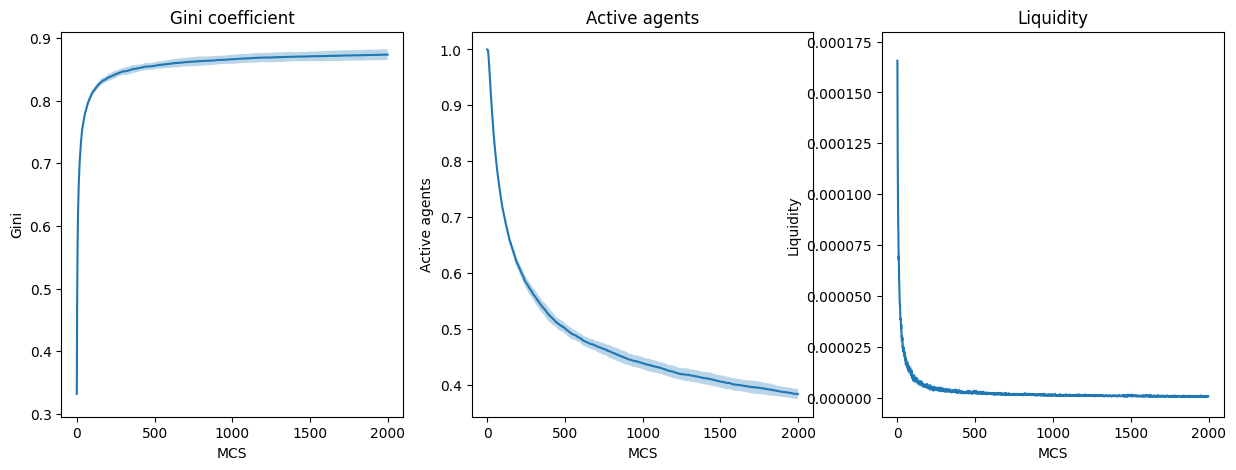

In [43]:
# Load files and calculate means and stds
filename = 'testing'
ginis = np.load(os.path.join(datapath, filename, "_gini.npy"))
n_actives = np.load(os.path.join(datapath, filename, "_n_actives.npy"))
liquiditys = np.load(os.path.join(datapath, filename, "_liquidity.npy"))

ginis_mean = np.mean(ginis, axis=0)
ginis_std = np.std(ginis, axis=0)
n_actives_mean = np.mean(n_actives, axis=0)
n_actives_std = np.std(n_actives, axis=0)
liquiditys_mean = np.mean(liquiditys, axis=0)
liquiditys_std = np.std(liquiditys, axis=0)

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(ginis_mean)
ax[0].fill_between(
    np.arange(ginis_mean.shape[0]), ginis_mean - ginis_std, ginis_mean + ginis_std, alpha=0.3
)
ax[0].set_xlabel("MCS")
ax[0].set_ylabel("Gini")
ax[0].set_title("Gini coefficient")

ax[1].plot(n_actives_mean)
ax[1].fill_between(
    np.arange(n_actives_mean.shape[0]),
    n_actives_mean - n_actives_std,
    n_actives_mean + n_actives_std,
    alpha=0.3,
)
ax[1].set_xlabel("MCS")
ax[1].set_ylabel("Active agents")
ax[1].set_title("Active agents")

ax[2].plot(liquiditys_mean)
ax[2].fill_between(
    np.arange(liquiditys_mean.shape[0]),
    liquiditys_mean - liquiditys_std,
    liquiditys_mean + liquiditys_std,
    alpha=0.3,
)
ax[2].set_xlabel("MCS")
ax[2].set_ylabel("Liquidity")
ax[2].set_title("Liquidity")
fig.savefig(os.path.join(figpath, "testing.png"))
plt.show()
